# Exploring Bay Wheels' Bike Share trip data
## by Mayukh Chakravartti

This dataset contains the bike trip details for Bay Wheel's bike sharing program

## Import and Constants

In [0]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import os

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Constants
data_folder = '/content/drive/My Drive/Colab Notebooks/Data Visualization/Project/Data/'
base_color = sb.color_palette()[0]

## Load and Cleanup Dataset

In [0]:
# Load the data
all_files = glob.glob(os.path.join(data_folder, '*.csv'))
df_bikedata = pd.concat((pd.read_csv(f, low_memory=False) for f in all_files), sort=False, ignore_index=True)
df_bikedata.reset_index(drop=True, inplace=True)

In [5]:
# Structure of the data
df_bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256681 entries, 0 to 4256680
Data columns (total 17 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
rental_access_method       object
dtypes: float64(7), int64(2), object(8)
memory usage: 552.1+ MB


In [6]:
# Some sample rows
df_bikedata.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,rental_access_method
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,1988.0,Male,No,NaN
1,943,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,1987.0,Male,No,NaN
2,18587,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,1986.0,Female,No,NaN
3,18558,2018-02-28 18:20:53.6210,2018-02-28 23:30:12.4500,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,1981.0,Male,No,NaN
4,885,2018-02-28 23:15:12.8580,2018-02-28 23:29:58.6080,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,1976.0,Female,Yes,NaN


In [7]:
# Data Cleanup 1 Start Time and End Time are objects, lets change that to Datetime types
# Check for any nulls
df_bikedata.end_time.isnull().sum(), df_bikedata.start_time.isnull().sum()

(0, 0)

In [8]:
# Change column type to DatTime
df_bikedata.start_time = pd.to_datetime(df_bikedata.start_time)
df_bikedata.end_time = pd.to_datetime(df_bikedata.end_time)
# Data Cleanup 2 Change Birth Year to an integer instead of a int64
df_bikedata.member_birth_year = df_bikedata.member_birth_year.fillna(0).astype(int)
# Data Cleanup 3 Cleanup the column member_gender
df_bikedata.member_gender.unique()

array(['Male', 'Female', nan, 'Other', 'M', '?', 'F', 'O'], dtype=object)

In [0]:
di = {'M': 'Male', 
      'F': 'Female',
      'O': 'Other',
      'Male': 'Male',
      'Female': 'Female',
      'Other': 'Other'}
df_bikedata.member_gender = df_bikedata.member_gender.map(di)

In [0]:
# Data Cleanup 4 Change columns user_type, member_gender, rental_access_method to categorical
df_bikedata.user_type = df_bikedata.user_type.astype('category')
df_bikedata.member_gender = df_bikedata.member_gender.astype('category')
df_bikedata.rental_access_method = df_bikedata.rental_access_method.astype('category')
# Lets add a minute column for Duration
df_bikedata['duration_min'] = round(df_bikedata.duration_sec/60).astype(int)

In [0]:
# Some additional columns to be used for Data Visualization
df_bikedata['Start_Year_Month']=df_bikedata.start_time.dt.strftime('%Y-%m')
df_bikedata['member_age'] =  df_bikedata.start_time.dt.year - df_bikedata.member_birth_year
df_bikedata['Start_Time_Hour'] = df_bikedata.start_time.dt.hour
df_bikedata['Start_Day_Of_Week'] = df_bikedata.start_time.dt.weekday_name

In [0]:
day_type = {'Monday':'Weekday', 'Tuesday':'Weekday', 'Wednesday':'Weekday', 'Thursday':'Weekday', 'Friday':'Weekday', 'Saturday':'Weekend', 'Sunday':'Weekend'}
df_bikedata['Start_Day_Type'] = df_bikedata.Start_Day_Of_Week.apply(lambda x: day_type[x])

In [13]:
df_bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256681 entries, 0 to 4256680
Data columns (total 23 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  category
member_birth_year          int64
member_gender              category
bike_share_for_all_trip    object
rental_access_method       category
duration_min               int64
Start_Year_Month           object
member_age                 int64
Start_Time_Hour            int64
Start_Day_Of_Week          object
Start_Day_Type             object
dtypes: category(3), datetime64[ns](2), float64(6), int64(6), object(6)
memory usag

In [14]:
df_bikedata.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,rental_access_method,duration_min,Start_Year_Month,member_age,Start_Time_Hour,Start_Day_Of_Week,Start_Day_Type
0,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,1988,Male,No,NaN,10,2018-02,30,23,Wednesday,Weekday
1,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,1987,Male,No,NaN,16,2018-02,31,23,Wednesday,Weekday
2,18587,2018-02-28 18:20:55.190,2018-02-28 23:30:42.925,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,1986,Female,No,NaN,310,2018-02,32,18,Wednesday,Weekday
3,18558,2018-02-28 18:20:53.621,2018-02-28 23:30:12.450,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,1981,Male,No,NaN,309,2018-02,37,18,Wednesday,Weekday
4,885,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,1976,Female,Yes,NaN,15,2018-02,42,23,Wednesday,Weekday


## Areas of Interest

### What is the structure of your dataset?

- The dataset contains the trip details of Bay Wheel/Ford Go's Bike Rental trip details. It contains start time, end time, duration, start and end location details, information regarding the rider's general information for sex and year of birth and how this ride was accessed

### What is/are the main feature(s) of interest in your dataset?
*   Number of Rides
  * Trend in the number of rides over time - year/month
  * How does the number of rides vary over weekdays vs weekends
  * How has the number of rides on weekdays vs weekends varied over time
  * What are the number of rides by gender
  * What are the average number of rides by Rental Access Type
  
*   Duration
  * What are the most common trip durations
  * How has the trip duration trended over time
  * How does the trip duration vary by most popular starting stations
  * How does the trip duration vary by gender
  * How has the trip duration varied by gender over time
  * How has the trip duration varied by age
  * How has the trip duration varied by the time of day
  * How does the trip duration vary by the gender and start time of day
  * How has the trip duration varied by the time of day over time

* Stations
  * What are the most popular starting and ending stations
  * What is the gender breakup for the rides from the most popular stations
  * How has the popularity of the top 5 most popular stations trended over time
  * How has the number of starting/ending stations affected the total number of bike rides
  * How has the average ride duration impacted by the number of stations

## Univariate Section

#### Trend in the number of rides over time - year/month/weeks

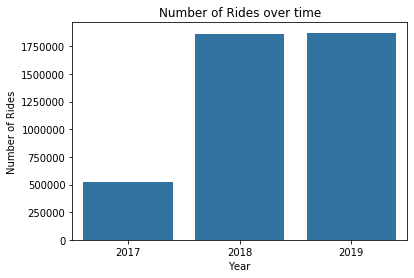

In [15]:
# Number of Bikerides over time - Year
sb.countplot(data=df_bikedata, x=df_bikedata.start_time.dt.year, color=base_color);
plt.xlabel('Year');
plt.ylabel('Number of Rides');
plt.title('Number of Rides over time');

- Number of bike rides have increased year on year and seems to be increasing even for the current year of 2019

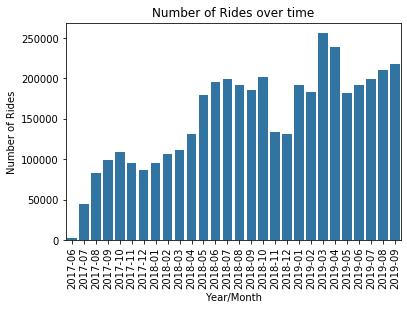

In [16]:
# Number of Bikerides over time - Month/Year
order = np.array(df_bikedata.Start_Year_Month.sort_values().unique())
sb.countplot(data=df_bikedata, x='Start_Year_Month', color=base_color, order=order);
plt.xlabel('Year/Month');
plt.ylabel('Number of Rides');
plt.xticks(rotation=90);
plt.title('Number of Rides over time');

- Monthly usage seems to have increased month over month with a dip in November and December. This could be due to the holiday season when people are travelling or working from home and there are lot of holidays. Susbsequent months show that the number of rides jump back to normal from January and are trending upwards

### How does the number of rides vary over weekdays vs weekends

In [0]:
# Number of Bike Rides for the day of the week as a percentage
total_rides = df_bikedata.shape[0]
max_day_of_week_count = df_bikedata.Start_Day_Of_Week.value_counts().max()
max_prop = max_day_of_week_count / total_rides
ytick_values = np.arange(0, max_prop + 0.02, 0.02)
yticks_labels = ['{:0.0f}'.format(v*100) for v in ytick_values]

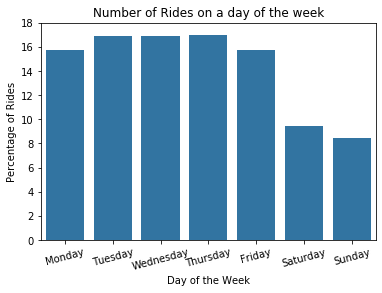

In [18]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.countplot(data=df_bikedata, x='Start_Day_Of_Week', color=base_color, order=order);
plt.yticks(ytick_values*total_rides, yticks_labels);
plt.xlabel('Day of the Week');
plt.ylabel('Percentage of Rides');
plt.xticks(rotation=15);
plt.title('Number of Rides on a day of the week');

In [0]:
# Breakup of rides between Weekdays vs Weekends
total_rides = df_bikedata.shape[0]
max_typeofday_count = df_bikedata.Start_Day_Type.value_counts().max()
max_prop = max_typeofday_count / total_rides
ytick_values = np.arange(0, max_prop + 0.2, 0.1)
yticks_labels = ['{:0.0f}'.format(v*100) for v in ytick_values]

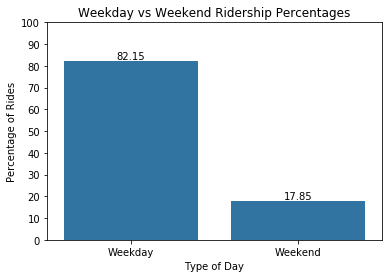

In [20]:
ax = sb.countplot(data=df_bikedata, x='Start_Day_Type', color=base_color);
plt.xlabel('Type of Day');
plt.ylabel('Percentage of Rides');
plt.yticks(ytick_values*total_rides, yticks_labels);
total = df_bikedata.shape[0]
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2,
          height + 40000,
          '{:1.2f}'.format(100*height/total),
          ha="center")
plt.title('Weekday vs Weekend Ridership Percentages');

- Most of the rides are during weekdays, with over 82% happening during weekdays as against around 18% on weekends

### What are the number of rides by gender

In [0]:
df_bikedata_tmp = df_bikedata.dropna(subset=['member_gender'])
total_rides = df_bikedata_tmp.shape[0]
max_gender_count = df_bikedata_tmp.member_gender.value_counts().max()
max_prop = max_gender_count / total_rides
ytick_values = np.arange(0, max_prop + 0.1, 0.1)
yticks_labels = ['{:0.0f}'.format(100*v) for v in ytick_values]

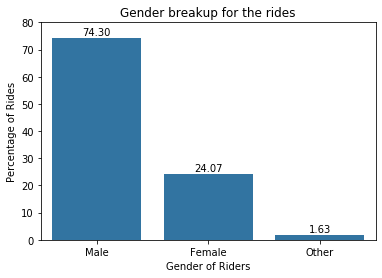

In [22]:
order_gender_plot = df_bikedata_tmp.member_gender.value_counts().index
ax = sb.countplot(data=df_bikedata_tmp, x='member_gender', color=base_color, order=order_gender_plot)
plt.yticks(ytick_values*total_rides, yticks_labels);
plt.xlabel('Gender of Riders')
plt.ylabel('Percentage of Rides');
total = df_bikedata_tmp.shape[0]
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2,
          height+40000,
          '{:1.2f}'.format(100*height/total),
          ha="center")
plt.title('Gender breakup for the rides');

- Almost 75% of riders are men while women make up 24.07% of the total rides.

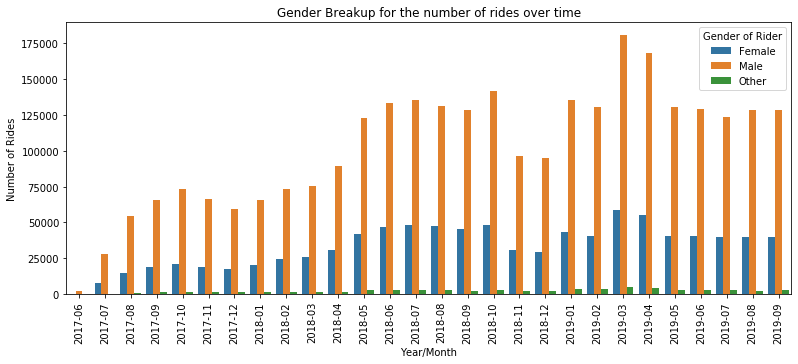

In [23]:
order = np.array(df_bikedata_tmp.Start_Year_Month.sort_values().unique())
plt.figure(figsize=(13,5));
sb.countplot(data=df_bikedata_tmp, x='Start_Year_Month', hue='member_gender', order=order);
plt.xlabel('Year/Month');
plt.ylabel('Number of Rides');
plt.xticks(rotation=90);
plt.legend(title = 'Gender of Rider', bbox_to_anchor=(1,1));
plt.title('Gender Breakup for the number of rides over time');

- There has been major spike in the number of male riders through time, however, the number of male and female riders has more or less stabilised in the last 4 to 5 months with a similar distribution as seen as a whole

### What are the average number of rides by Rental Access Type

In [0]:
df_bikedata_tmp = df_bikedata.dropna(subset=['rental_access_method'])
total_rides = df_bikedata_tmp.shape[0]
max_accesstype_count = df_bikedata_tmp.rental_access_method.value_counts().max()
max_prop = max_accesstype_count / total_rides
ytick_values = np.arange(0, max_prop + 0.2, 0.1)
yticks_labels = ['{:0.0f}'.format(100*v) for v in ytick_values]

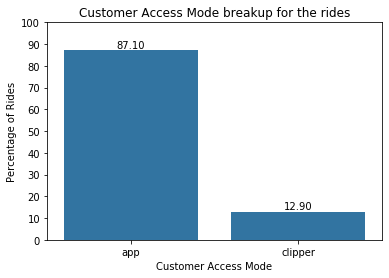

In [25]:
ax = sb.countplot(data=df_bikedata_tmp, x='rental_access_method', color=base_color)
plt.yticks(ytick_values*total_rides, yticks_labels);
plt.xlabel('Customer Access Mode')
plt.ylabel('Percentage of Rides');
total = df_bikedata_tmp.shape[0]
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2,
          height+400,
          '{:1.2f}'.format(100*height/total),
          ha="center")
plt.title('Customer Access Mode breakup for the rides');

- The majority of rides 87% are coming via the app and only 13% coming via clipper

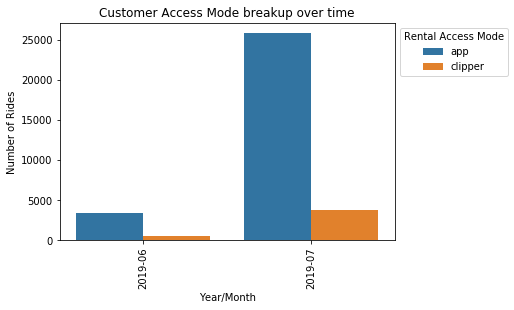

In [26]:
order = np.array(df_bikedata_tmp.Start_Year_Month.sort_values().unique())
sb.countplot(data=df_bikedata_tmp, x='Start_Year_Month', hue='rental_access_method', order=order);
plt.xlabel('Year/Month');
plt.ylabel('Number of Rides');
plt.xticks(rotation=90);
plt.legend(title = 'Rental Access Mode', bbox_to_anchor=(1,1));
plt.title('Customer Access Mode breakup over time');

- Looks like this data is available only for the last two months. However shows that the app is definitely more prefered way of accessing rides

### What are the most common trip durations

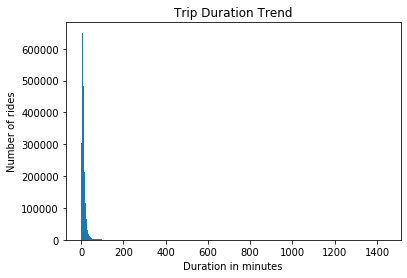

In [27]:
bins = np.arange(0, df_bikedata.duration_min.max()+2, 2)
plt.hist(data=df_bikedata, x='duration_min', bins=bins);
plt.xlabel('Duration in minutes');
plt.ylabel('Number of rides');
plt.title('Trip Duration Trend');

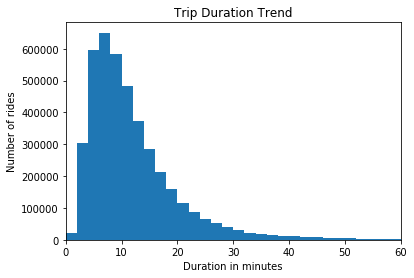

In [28]:
# Looks like most bike trips are much lesser than highest, lets zoom into that area
plt.hist(data=df_bikedata, x='duration_min', bins=bins);
plt.xlim((0, 60));
plt.xlabel('Duration in minutes');
plt.ylabel('Number of rides');
plt.title('Trip Duration Trend');

- Looks like most bike rides are around 7 and 11 minutes

## Bivariate Section

### How has the number of rides on weekdays vs weekends varied over time

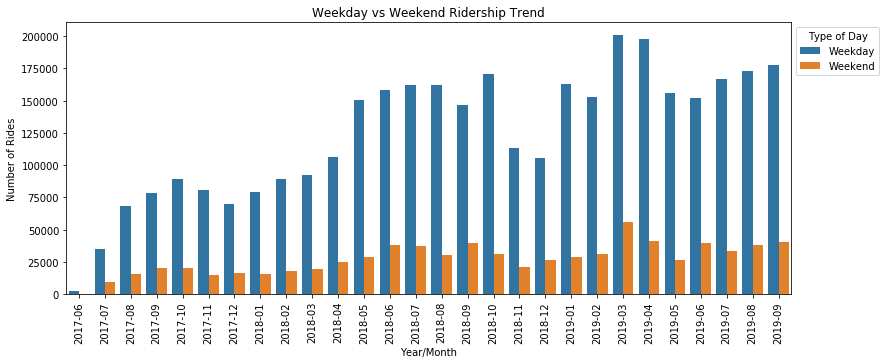

In [29]:
order = np.array(df_bikedata.Start_Year_Month.sort_values().unique())
plt.figure(figsize=(13,5));
sb.countplot(data=df_bikedata, x='Start_Year_Month', hue='Start_Day_Type', order=order);
plt.xlabel('Year/Month');
plt.ylabel('Number of Rides');
plt.xticks(rotation=90);
plt.legend(title = 'Type of Day', bbox_to_anchor=(1,1));
plt.title('Weekday vs Weekend Ridership Trend');

### How has the trip duration trended over time

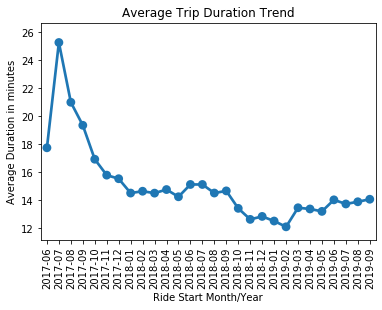

In [30]:
order = np.array(df_bikedata.Start_Year_Month.sort_values().unique())
sb.pointplot(data=df_bikedata, x='Start_Year_Month', y='duration_min', color=base_color, order=order, errwidth=0);
plt.xticks(rotation=90);
plt.ylabel('Average Duration in minutes');
plt.xlabel('Ride Start Month/Year');
plt.title('Average Trip Duration Trend');

- The average ride duration seems to have started off with a bang initially and then tapered off

### How does the trip duration vary by most popular starting stations

- I noticed that there is a mismatch/inaccuracies in the station id and names. I did explore the data and found 57 mismatches but it would take quite some time to resolve all of them. Thats why i am going with station names instead

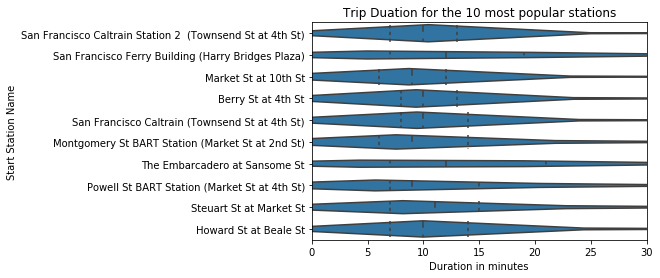

In [31]:
df_bikedata_wo_na = df_bikedata.dropna(subset=['start_station_name'])
order=df_bikedata.start_station_name.value_counts()[:10].index
sb.violinplot(data=df_bikedata_wo_na, y='start_station_name', x='duration_min', order=order, color=base_color, inner='quartile');
plt.xlim((0, 30)); # Zooming in on the bulk of the data
plt.xlabel('Duration in minutes');
plt.ylabel('Start Station Name');
plt.title('Trip Duation for the 10 most popular stations');

- Most of the Mean times for these top 10 stations vary between 8 and 13 mins. Interestingly, for San Francisco Ferry Building station and The Embercado station, its almost an equal spread in terms of the number of rides by duration till 20 min mark

### How does the trip duration vary by gender

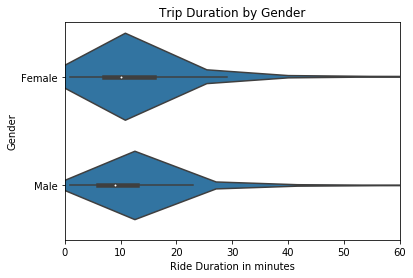

In [32]:
# Excluding gender type Other
df_bikedata_tmp = df_bikedata[df_bikedata.member_gender.isin(['Male', 'Female'])]
sb.violinplot(data=df_bikedata_tmp, y='member_gender', x='duration_min', color=base_color, order=['Female', 'Male']);
plt.ylabel('Gender');
plt.xlabel('Ride Duration in minutes');
plt.xlim((0, 60)); # Restricting to the bulk of the data
plt.title('Trip Duration by Gender');

- The mean ride time for the female riders is higher than men

### How has the trip duration varied by age

In [0]:
# Lets add a column for Member age
df_bikedata_tmp = df_bikedata[df_bikedata.member_age<100] # exlcuding the records where the age is invalid 

In [34]:
df_bikedata_tmp[['member_age', 'duration_min']].describe()

,member_age,duration_min
count,3.888425e+06,3.888425e+06
mean,3.474792e+01,1.278701e+01
std,1.015223e+01,3.180762e+01
min,1.800000e+01,1.000000e+00
25%,2.700000e+01,6.000000e+00
50%,3.200000e+01,9.000000e+00
75%,4.000000e+01,1.400000e+01
max,9.900000e+01,1.438000e+03


In [0]:
bins_x = np.arange(df_bikedata_tmp.member_age.min()-3, df_bikedata_tmp.member_age.max() + 1, 3)
bins_y = np.arange(df_bikedata_tmp.duration_min.min()-3, df_bikedata_tmp.duration_min.max()+1, 3)

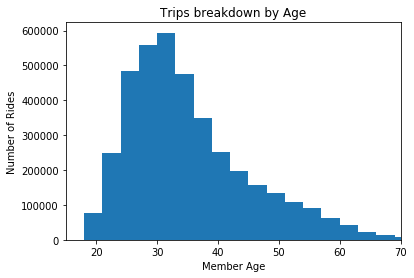

In [36]:
plt.hist(data=df_bikedata_tmp, x='member_age', bins=bins_x);
plt.xlabel('Member Age');
plt.ylabel('Number of Rides');
plt.xlim((15, 70)); # Limiting it to the bulk of the data
plt.title('Trips breakdown by Age');

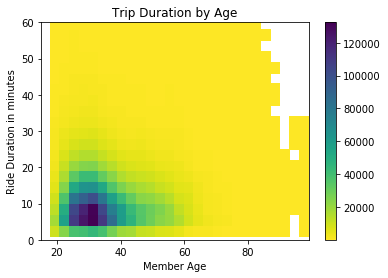

In [37]:
plt.hist2d(data=df_bikedata_tmp, x='member_age', y='duration_min', cmin=0.5, cmap='viridis_r', bins=[bins_x, bins_y]);
plt.colorbar();
plt.xlabel('Member Age');
plt.ylabel('Ride Duration in minutes');
plt.ylim((0, 60)); # Limiting it to the bulk of the data
plt.title('Trip Duration by Age');

- Most people are in the age range of 25 to 35 riding between 8 and 15 mins

### How has the trip duration varied by the time of day

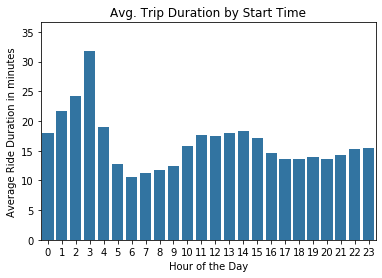

In [38]:
sb.barplot(data=df_bikedata, x=df_bikedata.start_time.dt.hour, y='duration_min', color=base_color, errwidth=0);
plt.ylabel('Average Ride Duration in minutes');
plt.xlabel('Hour of the Day');
plt.title('Avg. Trip Duration by Start Time');

- Interestingly, the maximum average ride duration are for the ones that start at 3 am in the morning. However, this could be possibly because there are fewer rides happening at this time causing the spike

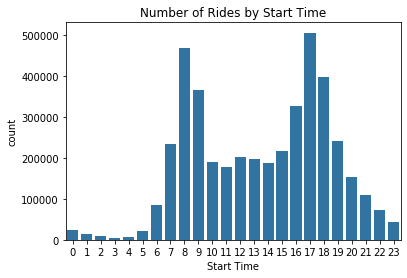

In [39]:
sb.countplot(data=df_bikedata, x=df_bikedata.start_time.dt.hour, color=base_color)
plt.xlabel('Start Time');
plt.title('Number of Rides by Start Time');

- The above plot shows how many rides were done at the hour of the day and as it shows, 3 am has the least number of rides

### What are the most popular stations

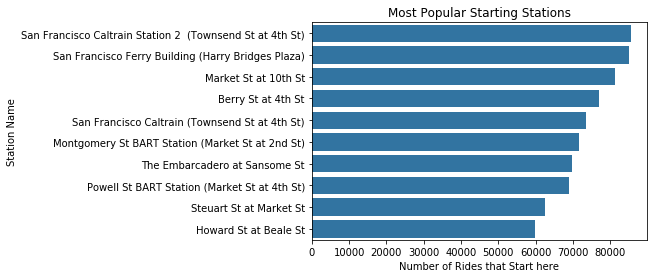

In [40]:
# Top 10 starting stations
order = df_bikedata.start_station_name.value_counts()[:10].index
sb.countplot(data=df_bikedata, y='start_station_name', color=base_color, order=order);
plt.xlabel('Number of Rides that Start here');
plt.ylabel('Station Name');
plt.title('Most Popular Starting Stations');

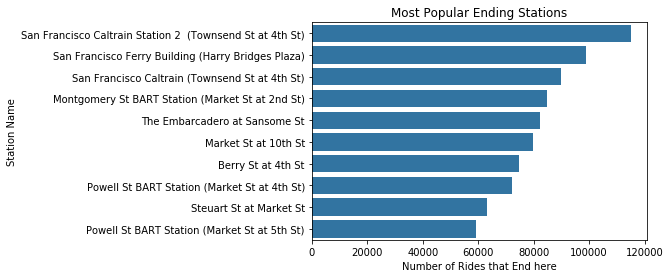

In [41]:
# Top 10 ending stations
sb.countplot(data=df_bikedata, y='end_station_name', color=base_color, order=df_bikedata.end_station_name.value_counts()[:10].index);
plt.xlabel('Number of Rides that End here');
plt.ylabel('Station Name');
plt.title('Most Popular Ending Stations');

- Looks like the 'San Francisco Caltrain Station 2' is both the most popular starting and end points

### What is the gender breakup for the rides from the most popular stations

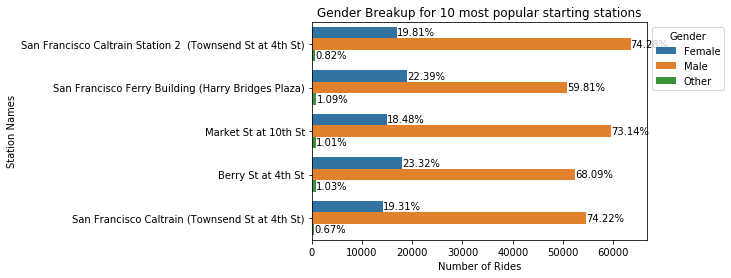

In [42]:
station_counts = df_bikedata.start_station_name.value_counts()[:5]
order = station_counts.index
cplot = sb.countplot(data=df_bikedata, y='start_station_name', hue='member_gender', order=order);
plt.xlabel('Number of Rides');
plt.ylabel('Station Names');
plt.legend(title = 'Gender', bbox_to_anchor=(1,1));
plt.title('Gender Breakup for 10 most popular starting stations');

# Adding percentages instead of absolute counts
i = 0
for p in cplot.patches:
  max_count = df_bikedata.start_station_name.value_counts()[i]
  str_pct = '{:1.2f}%'.format(100*p.get_width()/max_count)
  cplot.text(p.get_x() + p.get_width(), p.get_y()+0.2, str_pct)
  i = i + 1
  if(i%5==0):
    i = 0

- The percentage of women riders hovers between 18% and 23% even in the most popular starting stations

### How has the number of starting/ending stations over time affected the total number of rides

In [43]:
df_temp = df_bikedata.groupby(['Start_Year_Month'], as_index=False).agg({'start_station_name': pd.Series.nunique, 'end_station_name': pd.Series.nunique, 'duration_sec': 'count'})
df_temp.rename(columns={'start_station_name': 'number_of_start_stations', 'end_station_name': 'number_of_end_stations', 'duration_sec': 'number_of_rides' }, inplace=True)
df_temp['total_stations'] = df_temp.number_of_start_stations + df_temp.number_of_end_stations
df_temp.sort_values(['Start_Year_Month'], ascending=[True], inplace=True)
df_temp.head()

,Start_Year_Month,number_of_start_stations,number_of_end_stations,number_of_rides,total_stations
0,2017-06,41,41,2689,82
1,2017-07,153,153,44073,306
2,2017-08,209,210,83292,419
3,2017-09,235,235,98558,470
4,2017-10,247,247,108937,494


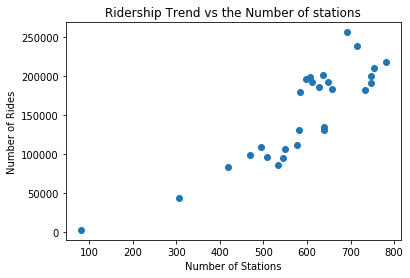

In [44]:
plt.scatter(data=df_temp, x='total_stations', y='number_of_rides');
plt.xlabel('Number of Stations');
plt.ylabel('Number of Rides');
plt.title('Ridership Trend vs the Number of stations');

- This graph shows that the number of rides have increased with addition of stations. The critical jump in ridership happened when the number of stations went from 500 to 600 stations where the number of rides increased from 80,000 to almost 200,000

### How has the average ride duration been impacted by the number of stations

In [45]:
df_temp = df_bikedata.groupby(['Start_Year_Month'], as_index=False).agg({'start_station_name': pd.Series.nunique, 'end_station_name': pd.Series.nunique, 'duration_min': 'mean'})
df_temp.rename(columns={'start_station_name': 'number_of_start_stations', 'end_station_name': 'number_of_end_stations', 'duration_min': 'avg_duration_min' }, inplace=True)
df_temp['total_stations'] = df_temp.number_of_start_stations + df_temp.number_of_end_stations
df_temp.sort_values(['total_stations'], ascending=[True], inplace=True)
df_temp.head()

,Start_Year_Month,number_of_start_stations,number_of_end_stations,avg_duration_min,total_stations
0,2017-06,41,41,17.751581,82
1,2017-07,153,153,25.278651,306
2,2017-08,209,210,21.006111,419
3,2017-09,235,235,19.359677,470
4,2017-10,247,247,16.933227,494


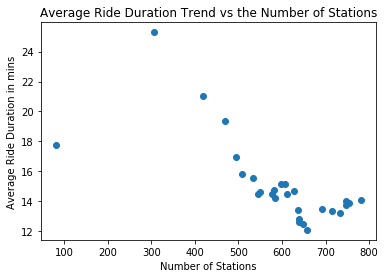

In [46]:
plt.scatter(data=df_temp, x='total_stations', y='avg_duration_min');
plt.xlabel('Number of Stations');
plt.ylabel('Average Ride Duration in mins');
plt.title('Average Ride Duration Trend vs the Number of Stations');

- As expected, as the number of stations increased, the number of rides increased, however due to the availability of more stations, the average ride duration has decreased

## Multivariate Section

### How does the trip duration vary by gender over time

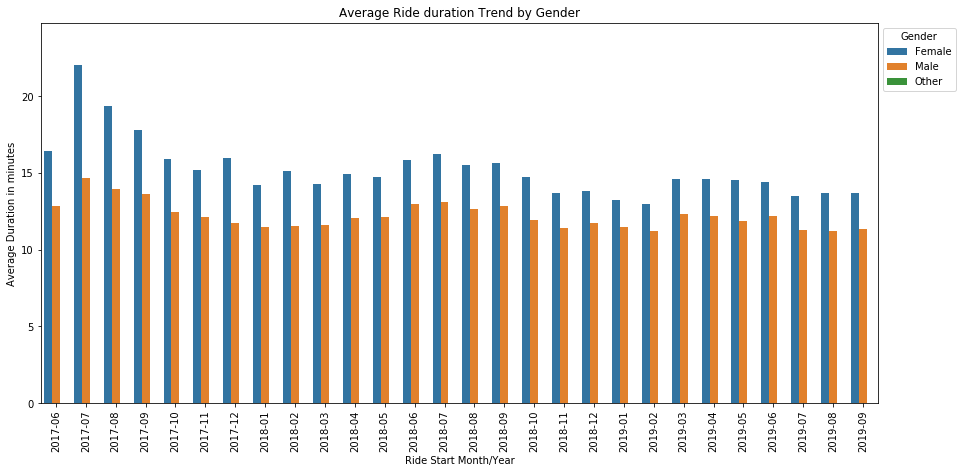

In [47]:
df_bikedata_tmp = df_bikedata[df_bikedata.member_gender.isin(['Male', 'Female'])]
order = np.array(df_bikedata.Start_Year_Month.sort_values().unique())
plt.figure(figsize=(15,7));
sb.barplot(data=df_bikedata_tmp, x='Start_Year_Month', y='duration_min', hue='member_gender', order=order, errwidth=0);
plt.xticks(rotation=90);
plt.ylabel('Average Duration in minutes');
plt.xlabel('Ride Start Month/Year');
plt.legend(title = 'Gender', bbox_to_anchor=(1,1));
plt.title('Average Ride duration Trend by Gender');

- Female riders have had consistently higher average ride times than their male counterparts. The group identified as Other has been excluded as they could be Other or just incorrect data

### How does the trip duration vary by the gender and start time of day

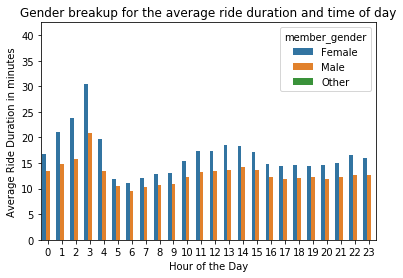

In [48]:
df_bikedata_tmp = df_bikedata[df_bikedata.member_gender.isin(['Male', 'Female'])]
sb.barplot(data=df_bikedata_tmp, x=df_bikedata.start_time.dt.hour, y='duration_min', errwidth=0, hue='member_gender');
plt.ylabel('Average Ride Duration in minutes');
plt.xlabel('Hour of the Day');
plt.title('Gender breakup for the average ride duration and time of day');

- Again, we notice that the ride duration for Female riders are higher than their male counterparts through all hours of the day

### How has the trip duration varied by the time of day over time

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


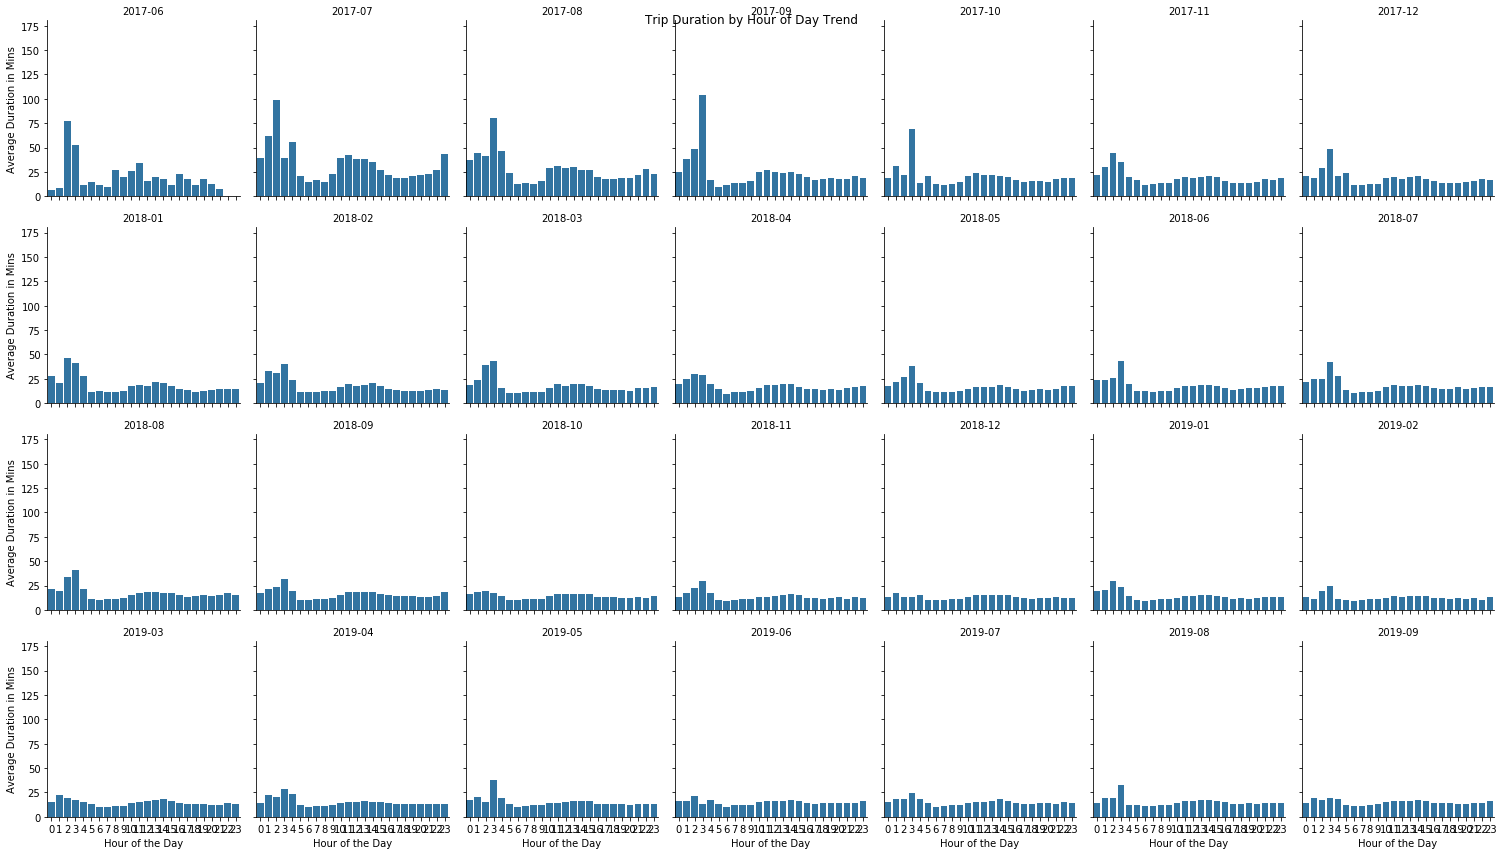

In [49]:
order = np.array(df_bikedata.Start_Year_Month.sort_values().unique())
g = sb.FacetGrid(data = df_bikedata, col = 'Start_Year_Month', col_order=order, col_wrap = 7);
g.map(sb.barplot, 'Start_Time_Hour', 'duration_min', errwidth=0);
g.set_titles('{col_name}');
g.set_axis_labels("Hour of the Day", "Average Duration in Mins");
g.fig.suptitle('Trip Duration by Hour of Day Trend');

### Which stations have become more popular over time

In [0]:
# Get the dataset for only top 5 starting stations
df_temp = df_bikedata[df_bikedata.start_station_name.isin(df_bikedata.start_station_name.value_counts()[:5].index)]

In [0]:
# Group the data to get the number of rides by month and station
df_temp = df_temp.groupby(['start_station_name', 'Start_Year_Month'], as_index=False).agg({'duration_min': 'count'})
df_temp.rename(columns={'duration_min': 'number_of_rides'}, inplace=True)
df_temp.sort_values(['start_station_name', 'Start_Year_Month'], ascending=[True, True], inplace=True)

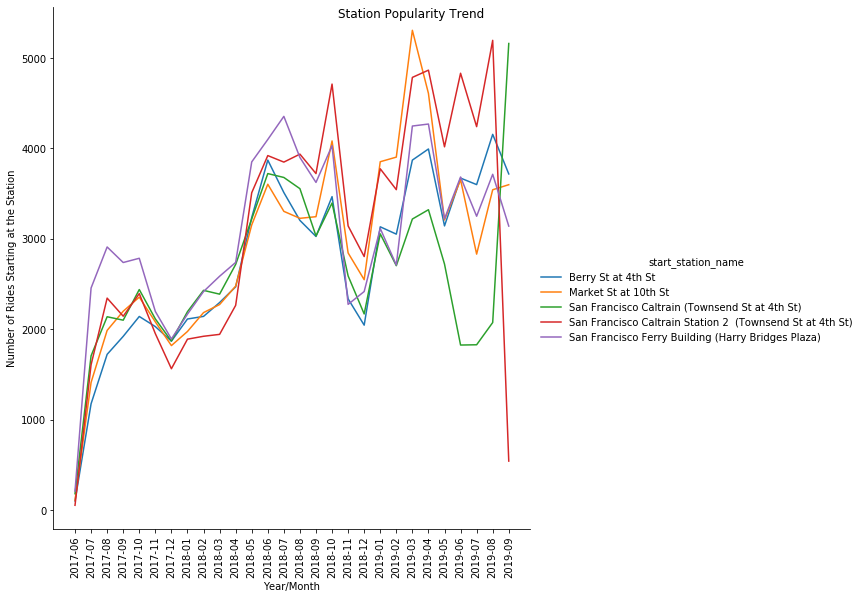

In [52]:
# Plot a map to show how the stations popularity has trended over time
g = sb.FacetGrid(data=df_temp, hue='start_station_name', height=8);
g.map(plt.plot, 'Start_Year_Month', 'number_of_rides');
g.set_titles('{col_name}');
g.add_legend();
g.set_axis_labels("Year/Month", "Number of Rides Starting at the Station");
for ax in g.axes.flat:
  for label in ax.get_xticklabels():
    label.set_rotation(90)
g.fig.suptitle('Station Popularity Trend');

*   Couple of interesting insights here:
  * This plot matches with the number of rides plot over time showing the dips at the end of the year
  * For the last month of September 2019, there is a drastic drop in the number of rides in San Francisco Caltrain Station 2 (Townsend St at 4th Street) and a similar drastic increase in the number of rides for San Francisco Caltrain (Townsend St at 4th St). These are not the same stations since they have different station id's. So there maybe some access issues which is sending people to the latter station
  * Every other stations shows a dip in the numbers other than Market St at 10th St for the month of Nov 2019
  * San Francisco Ferry Building station started out as the most popular station for more than a year till Aug 2018 where it was overtaken by the Caltrain Station 2
  * Market St at 10th Station briefly took the crown of the most popular starting station between Jan and Mar of 2019



## Exploring the Number of Rides data of the Bike sharing information

### Key Insights - Number of Trips
- The number of bike rides are trending upwards every year, however, the increase we see between 2017 and 2018 is due to the fact the service started midway between 2017 as against the whole of 2018
- Almost 82% of the rides are done during the weekdays as against only 18% over the weekend
- This trend has remained more or less the same since the start of the ride services
- Around 74% of the rides have been taken by men and only 24% by women. Somehow, the ride has failed to attract women or the areas in which the stations are available do not have enough women who would consider this service? This trend has also remained more or less the same with some spikes over time
- The rental access mode data has been available only for the last couple of months however customers have a clear favorite in terms of prefering the app to be the way to access the ride

## Exploring the Duration aspect of the Bike Sharing data

### Key Insights - Duration
- Most bike rides are between 7 and 11 mins
- Initially when the service started, the average ride duration (by month) was as high as 25 mins in the first couple of months and then has tapered down and has in the last couple of months started to rise up again
- Looking at the ride durations from the 10 most popular starting stations, the average ride durations vary between 8 and 13 mins.
- On an average, female riders ride for longer durations compared to their male counterparts. This is true for any hour of the day since the time this service was introduced.
- Looking at the age and the ride durations, most people are in the age range of 25 to 35 riding between 8 and 15 mins
- Average ride durations are higher during the afternoon and later in the night
- When looking at the average ride duration trend over time for the given hour of the day, it is consisten with the overall average. One interesting point is that the average ride duration at 3 or 4 am seems unusually high. This is probably because there are much lesser number of rides and for the people that do use them at this hour are riding for a longer period

## Exploring the Station aspect of the Bike Sharing data

### Key Insights - Stations
- 'San Francisco Caltrain Station 2' is both the most popular starting and end points
- The percentage of women riders hovers between 18% and 23% even in the most popular starting stations
- The number of rides have increased with addition of stations. The critical jump in ridership happened when the number of stations went from 500 to 600 stations where the number of rides increased from 80,000 to almost 200,000
- As the number of stations increased, the number of rides increased, however due to the availability of more stations, the average ride duration has decreased
- For the last month of September 2019, there is a drastic drop in the number of rides in San Francisco Caltrain Station 2 (Townsend St at 4th Street) and a similar drastic increase in the number of rides for San Francisco Caltrain (Townsend St at 4th St). These are not the same stations since they have different station id's. So there maybe some access issues which is sending people to the latter station
- Every other stations shows a dip in the numbers other than Market St at 10th St for the month of Nov 2019
- San Francisco Ferry Building station started out as the most popular station for more than a year till Aug 2018 where it was overtaken by the Caltrain Station 2
- Market St at 10th Station briefly took the crown of the most popular starting station between Jan and Mar of 2019